# Chapter 2

This workbook focuses on _insertion and merge sort_.  This is a sorting algorithm of asymptotic efficiency *O(n<sup>2</sup>)*.  For any element $j$ in set $A$, it inserts $A[j]$ to the left until it is larger than the previous value.  

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import random

%matplotlib inline


In [3]:
# Insertion-Sort Algorithm, ascending order
def ins_sort_asc(A):
    for j in range(1, len(A)):
        key = A[j]
        i = j-1
        while i >= 0 and A[i] > key:
            A[i+1] = A[i]
            i = i-1
        A[i+1] = key
    return A


In [4]:
# Example
unsorted = [3,2,5,6,4,7,8,1]

ins_sort_asc(unsorted)

[1, 2, 3, 4, 5, 6, 7, 8]

In [5]:
# Insertion-Sort Algorithm, descending order
def ins_sort_dec(A):
    for j in range(1, len(A)):
        key = A[j]
        i = j-1
        while i >= 0 and A[i] < key:
            A[i+1] = A[i]
            i = i-1
        A[i+1] = key
    return A


In [6]:
ins_sort_dec(unsorted)

[8, 7, 6, 5, 4, 3, 2, 1]

In [7]:
# Problem 1-3
# Linear search
def lin_search(A, v):
    # A is list of values, v is key
    for j in range(0, len(A)):
        if A[j] == v:
            return j
    return None
            

In [8]:
# Example that should find value
assert(lin_search(unsorted, 4) == 4)

# Example that should not find value
assert(lin_search(unsorted, 9) == None)


In [9]:
# Here we will show that ins_sort_asc behaves with O(n^2)

iter = 10

l_length = 100

# Magnitudes of 10
steps = 20

sizes = []
for i in range(0, steps):
    sizes.append(l_length + i*100)

# Avg time list for each step
time_list = []
for i in sizes:
    times = []
    for j in range(0, iter):
        unsorted = np.random.randint(l_length, size = i)
        start = time.clock()
        ins_sort_asc(unsorted)
        lapse = time.clock() - start
        times.append(lapse)
    time_list.append(np.mean(times))
    print i
        


100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000


In [10]:
time_list

[0.0023381999999999349,
 0.0056555000000000797,
 0.011271600000000026,
 0.021356099999999944,
 0.035265899999999961,
 0.045581100000000062,
 0.061057200000000034,
 0.077698999999999963,
 0.10146530000000009,
 0.12563639999999995,
 0.15185010000000024,
 0.17810110000000012,
 0.23407459999999994,
 0.25546340000000017,
 0.27273839999999971,
 0.3286866,
 0.3635748999999997,
 0.40690049999999972,
 0.47652759999999894,
 0.47853049999999941]

In [11]:
df = pd.DataFrame({"Size": sizes, "Time": time_list})
df

,Size,Time
0,100,0.002338
1,200,0.005656
2,300,0.011272
3,400,0.021356
4,500,0.035266
5,600,0.045581
6,700,0.061057
7,800,0.077699
8,900,0.101465
9,1000,0.125636


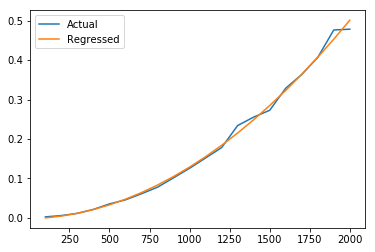

In [31]:
x = df.Size.tolist()
y = df.Time.tolist()

t = np.polyfit(x, y, 2)

def f(x):
    return t[0]*x**2 + t[1] * x + t[2]

z = []
for i in x:
    z.append(f(i))

plt.plot(x, y, label="Actual")
plt.plot(x, z, label="Regressed")
plt.legend()
plt.show()


In [43]:
# Problem 2-3: average linear search

times = []

for i in range(0, 1000):
    values = list(xrange(1,100))
    random.shuffle(values)
    start = time.clock()
    lin_search(values, 50)
    lapse = time.clock() - start
    times.append(lapse)

lindf = pd.DataFrame({"Time": times})
lindf = lindf*1000


[(0, 0.04)]

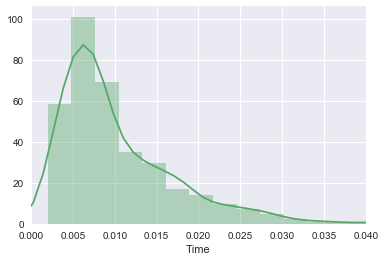

In [66]:
# Generate Geom(1/1000) data
z = np.random.geometric(p=1/1000, size=10000)
fig = sns.kdeplot(np.array(z), bw=0.5)
fig = sns.distplot(lindf.Time)
fig.set(xlim=[0, .04])
